In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns


In [27]:
# import some data to play with
comp = pd.read_csv("C://Users//Apeksha//Downloads//Company_Data.csv",index_col=0)

In [28]:
comp.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
print('comp length:', len(comp))
print('comp shape',comp.shape)

comp length: 400
comp shape (400, 10)


In [30]:
#Complete Company dataset
label_encoder = preprocessing.LabelEncoder()
comp['Price']= label_encoder.fit_transform(comp['Price']) 

In [31]:
x=comp.iloc[:,0:5]
y=comp['Price']

In [32]:
x

,CompPrice,Income,Advertising,Population,Price
Sales,,,,,
9.50,138,73,11,276,54
11.22,111,48,16,260,18
10.06,113,35,10,269,15
7.40,117,100,4,466,31
4.15,141,64,3,340,62
...,...,...,...,...,...
12.57,138,108,17,203,62
6.14,139,23,3,37,54
7.41,162,26,12,368,91


In [33]:
y

Sales
9.50     54
11.22    18
10.06    15
7.40     31
4.15     62
         ..
12.57    62
6.14     54
7.41     91
5.94     29
9.71     54
Name: Price, Length: 400, dtype: int64

In [34]:
comp['Price'].unique()

array([ 54,  18,  15,  31,  62,  10,  42,  58,  34,  28,  70,  20,  52,
        77,  44,  65,   7,  55,  43,  72,  47,  17,  41,  36,  23,  71,
        30,  60,   0,  68,  29,  69,   9,  32,  82,  63,  53,  86,  19,
        51,  37,  48,  57,  67,  35,  38,  25,  49,  33,  83,  50,  26,
        78,  24,  14,  73,  46,  45,  59,  81,  66,  61,  40,  84,  21,
        87,   1,  80,  12,  91,   8,  89,  92,  75, 100,  27,   4,  99,
        56,  16,  74,  98,  79,  64,   6,  39,  94,  22,  88,  96,   5,
        90,  11,   3,  97,  85,  76,  95,  93,   2,  13], dtype=int64)

In [35]:
comp.Price.value_counts()

54    12
62    12
41    10
38    10
65    10
      ..
1      1
87     1
0      1
81     1
13     1
Name: Price, Length: 101, dtype: int64

In [36]:
colnames = list(comp.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [37]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

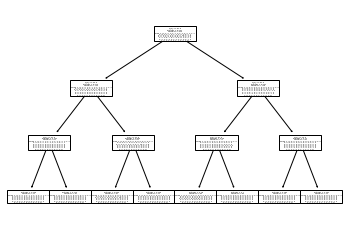

In [39]:
#PLot the decision tree
tree.plot_tree(model);


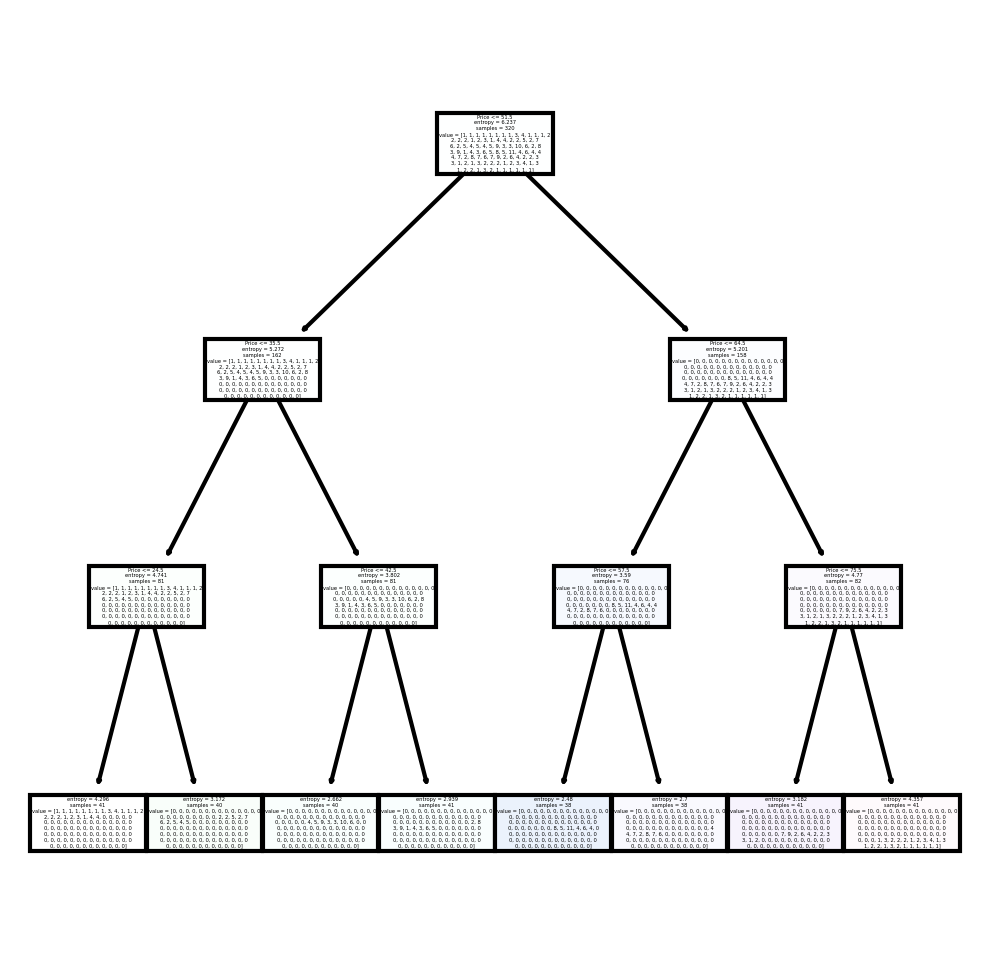

In [40]:
fn=['CompPrice','Income','Advertising','Population','Price']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True);

In [41]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

10    14
66    13
30    13
62    12
84    10
46     6
54     6
41     6
dtype: int64

In [42]:
preds

array([66, 46, 84, 30, 30, 84, 62, 10, 62, 10, 84, 46, 46, 10, 54, 30, 54,
       30, 62, 84, 10, 30, 54, 46, 66, 62, 66, 62, 66, 41, 10, 66, 10, 62,
       84, 10, 66, 66, 62, 54, 66, 66, 84, 30, 30, 10, 30, 41, 54, 84, 66,
       62, 30, 30, 84, 10, 41, 30, 10, 66, 66, 62, 10, 46, 41, 62, 62, 84,
       62, 10, 10, 30, 30, 54, 10, 41, 66, 46, 84, 41], dtype=int64)

In [43]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,10,30,41,46,54,62,66,84
Price,,,,,,,,
0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0
19,1,0,0,0,0,0,0,0
20,1,0,0,0,0,0,0,0


In [54]:
# Accuracy 
np.mean(preds==y_test)

0.075

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

#### Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = comp.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [62]:
#Find the accuracy
model.score(X_test,y_test)

-0.8409514998063212

# Random forest model



In [22]:
comp['Sales']='small'
comp.loc[df1['Sales']]>7.49,'Sales' = 'large'
comp.drop(['Sales'], axis=1, inplace = True)

SyntaxError: cannot assign to comparison (Temp/ipykernel_12948/3705230885.py, line 2)

In [25]:
x = comp.iloc[:,0:14]
y = comp.iloc[:,14]


NameError: name 'comp' is not defined

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

NameError: name 'train_test_split' is not defined

In [4]:
y_train.value_counts()


NameError: name 'y_train' is not defined

In [5]:
model = RF(n_jobs = 4, n_estimate)
model.fit(x_train, y_train)
model.oob_score_

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_12948/869004842.py, line 1)

In [6]:
pred_train = model.predict

NameError: name 'model' is not defined

In [7]:
accuracy_score(y_train,)

NameError: name 'accuracy_score' is not defined

In [8]:
confusion_matrix(y_train)



NameError: name 'confusion_matrix' is not defined

In [9]:
pred_test = model.predict


NameError: name 'model' is not defined

In [10]:
accuracy_score(y_test,)



NameError: name 'accuracy_score' is not defined

In [11]:
confusion_matrix(y_test,)

NameError: name 'confusion_matrix' is not defined

In [12]:
df_t = pd.DataFrame({})

NameError: name 'pd' is not defined

In [13]:
df_t


NameError: name 'df_t' is not defined

In [14]:
cols = list(df1.columns)

NameError: name 'df1' is not defined

In [15]:
predictors = cols[0:14]
target = cols[14]


NameError: name 'cols' is not defined

In [16]:
tree1 = model.estimator

NameError: name 'model' is not defined

In [17]:
dot_data = StringIO()

NameError: name 'StringIO' is not defined

In [18]:
export_graphviz(tree1,)

NameError: name 'export_graphviz' is not defined

In [19]:
graph = pydotplus.graph

NameError: name 'pydotplus' is not defined

In [ ]:
graph.write_png('')